In [1]:
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

C:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pa_model = models.inceptionV3()
pa_model.load_graphdef()

In [10]:
l2= lambda layer: objectives.L2(layer=layer)
sp=lambda layer: objectives.sigmoid_prob(layer=layer)
tv=lambda layer: objectives.total_variation(layer=layer)
dd=lambda layer: objectives.deepdream(layer=layer)

(1, 200, 200, 3)
256 1.3421707



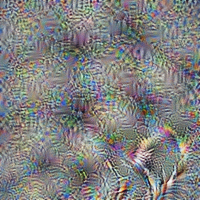

512 1.3158661



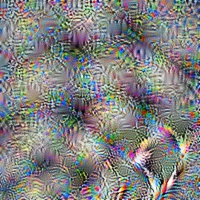

1024 1.5395327



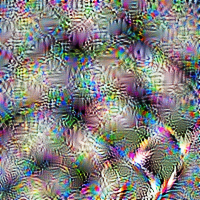

In [16]:
obj=sp('InceptionV3/InceptionV3/Mixed_6c/concat_v2')
param_f=lambda: param.image(w=200,h=200,fft=False)
_=render.render_vis(pa_model,obj,param_f=param_f,thresholds=(256,512,1024))

(1, 200, 200, 3)
256 9.036888



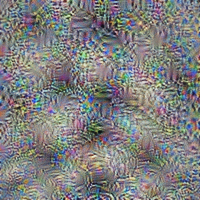

512 15.473487



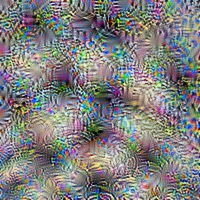

1024 20.25842



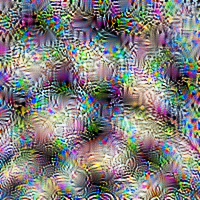

In [17]:
obj=dd('InceptionV3/InceptionV3/Mixed_6c/concat_v2')
param_f=lambda: param.image(w=200,h=200,fft=False)
_=render.render_vis(pa_model,obj,param_f=param_f,thresholds=(256,512,1024))

(1, 100, 100, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
256 [767.13]



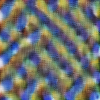

512 [1036.2708]



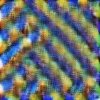

1024 [821.04016]



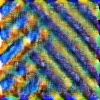

2048 [794.806]



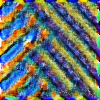

In [6]:
connection=lambda n,layer,x,y: objectives.neuron(channel_n=n,layer_name=layer,x=x,y=y)
obj=sp('conv3')+tv('conv3')
param_f=lambda: param.image(w=100,h=100,fft=False)
_=render.render_vis(pa_model,obj,param_f=param_f,thresholds=(256,512,1024,2048))

(1, 100, 100, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
256 [103.45233]



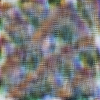

512 [138.12976]



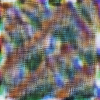

1024 [107.5912]



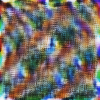

2048 [147.89478]



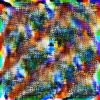

In [7]:
connection=lambda n,layer,x,y: objectives.neuron(channel_n=n,layer_name=layer,x=x,y=y)
obj=sp('conv4')+tv('conv4')
param_f=lambda: param.image(w=100,h=100,fft=False)
_=render.render_vis(pa_model,obj,param_f=param_f,thresholds=(256,512,1024,2048))

In [30]:
connection=lambda n,layer,x,y: objectives.neuron(channel_n=n,layer_name=layer,x=x,y=y)
obj=sp('fc1')+l2('fc1')
param_f=lambda: param.image(w=100,h=100,fft=False)
c4=lambda T: print(T('flat_feature'))
c4.description='flat_feature'
_=render.render_vis(pa_model,obj,param_f=param_f,thresholds=(256,512,1024,2048),print_objectives=[c4])

(1, 100, 100, 3)
Tensor("Shape_4:0", shape=(4,), dtype=int32)
Tensor("import/flat_feature:0", shape=(?, 392), dtype=float32)


TypeError: Fetch argument None has invalid type <class 'NoneType'>

In [6]:
gd=tf.Graph().as_graph_def()

In [15]:
with open('C:\\MLDatabases\\google-images-download-master\\downloads\\model_as_string.pb','rb') as f:
    gd=f.read()
gr_def=tf.GraphDef.ParseFromString(gd)
tf.import_graph_def(gr_def)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 525: character maps to <undefined>

In [7]:
def a():
    ok="OK"
    def b():
        ok="OK"
    return b

In [8]:
c=a()

In [9]:
c.ok

AttributeError: 'function' object has no attribute 'ok'